<h1> DATA 620 - Web Analytics </h1>
<h2> Week Five - Part 2 - Assignment: Document Classification </h2>
<h3> Group 3 - Rafal Decowski, Tze Fung Lung, Yun Mai, Ahsanul Choudhury </h3>

<h2> Assignment Requirement </h2>

It can be useful to be able to classify new "test" documents using already classified "training" documents.  A common example is using a corpus of labeled spam and ham (non-spam) e-mails to predict whether or not a new document is spam.  Here is one example of such data:  http://archive.ics.uci.edu/ml/datasets/Spambase

For this project, you can either use the above dataset to predict the class of new documents (either withheld from the training dataset or from another source such as your own spam folder).

________________________________________________________________________________________________________________________________




<h2> Load Data and Setup Environment </h2>

For the assignment we choose to go with the spam and ham dataset given as the example in the assignment requirement.

**Data Description** (Copied from http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.DOCUMENTATION)

Number of Instances: 4601 (1813 Spam = 39.4%)

Number of Attributes: 58 (57 continuous, 1 nominal class label)

**Attribute Information:**

The last column of 'spambase.data' denotes whether the e-mail was 
considered spam (1) or not (0), i.e. unsolicited commercial e-mail.  
Most of the attributes indicate whether a particular word or
character was frequently occuring in the e-mail.  The run-length
attributes (55-57) measure the length of sequences of consecutive 
capital letters.  For the statistical measures of each attribute, 
see the end of this file.  Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD,
i.e. 100 * (number of times the WORD appears in the e-mail) / 
total number of words in e-mail.  A "word" in this case is any 
string of alphanumeric characters bounded by non-alphanumeric 
characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR
= percentage of characters in the e-mail that match CHAR,
i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), 
i.e. unsolicited commercial e-mail.  


Missing Attribute Values: None

Class Distribution:
	Spam	  1813  (39.4%)
	Non-Spam  2788  (60.6%)


In [1]:
## Load modules
import pandas as pd
import urllib2
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


**Load DATA**

In [2]:
spambase_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',header=None)
spambase_data.head()


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


** Extract Attribute Names **

In [3]:
spambase_names = urllib2.urlopen('http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names')
spambase_name = spambase_names.read()

In [4]:
spambase_name = spambase_name.split('\n',33)[-1]
spambase_name = spambase_name.replace(':', '')
spambase_name = spambase_name.replace('.', '')
spambase_name = spambase_name.replace('continuous', '')
print spambase_name

word_freq_make         
word_freq_address      
word_freq_all          
word_freq_3d           
word_freq_our          
word_freq_over         
word_freq_remove       
word_freq_internet     
word_freq_order        
word_freq_mail         
word_freq_receive      
word_freq_will         
word_freq_people       
word_freq_report       
word_freq_addresses    
word_freq_free         
word_freq_business     
word_freq_email        
word_freq_you          
word_freq_credit       
word_freq_your         
word_freq_font         
word_freq_000          
word_freq_money        
word_freq_hp           
word_freq_hpl          
word_freq_george       
word_freq_650          
word_freq_lab          
word_freq_labs         
word_freq_telnet       
word_freq_857          
word_freq_data         
word_freq_415          
word_freq_85           
word_freq_technology   
word_freq_1999         
word_freq_parts        
word_freq_pm           
word_freq_direct       
word_freq_cs           
word_freq_meetin

** Combine Data with Attribute Names **

In [5]:
spambase_data.columns = ['word_freq_make','word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
                         'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
                         'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
                         'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
                         'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl',
                         'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 
                         'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
                         'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs',
                         'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu',
                         'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
                         'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
                         'capital_run_length_total', 'spam_class']
spambase_data.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


In [6]:
spambase_data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


<h3> Split Data into Train and Test Dataset </h3>

In [7]:
## Code modified from https://martibosch.github.io/blog/2016/08/27/how-to-do-your-machine-learning-assignments-in-10-mins.html
X = spambase_data.values[:, 0:57]
y = spambase_data.values[:, 57]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

<h2> Classification Models </h2>

<h3> Naive Bayes Classifier</h3>

** Gaussian Naive Bayes **

In [8]:
## Code modified from https://martibosch.github.io/blog/2016/08/27/how-to-do-your-machine-learning-assignments-in-10-mins.html
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_model.score(X_test, y_test)

0.83490224475018104

In [9]:
gnb_cm = confusion_matrix(y_test, gnb_model.predict(X_test))

pd.DataFrame(data = gnb_cm, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,623,213
Actual 1,15,530


In [10]:
gnb_pred = gnb_model.predict(X_test)
print("Number of mislabeled emails out of a total %d emails : %d"
       % (X_test.shape[0],(y_test != gnb_pred).sum()))
print("%d non-spam emails are mislabeled as spam and %d spam emails are mislabeled as non-spam."
      % (gnb_cm [0,1], gnb_cm[1,0]))

Number of mislabeled emails out of a total 1381 emails : 228
213 non-spam emails are mislabeled as spam and 15 spam emails are mislabeled as non-spam.


** Multinomial Naive Bayes **

In [11]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)
mnb_model.score(X_test, y_test)

0.80738595220854459

In [12]:
mnb_cm = confusion_matrix(y_test, mnb_model.predict(X_test))

pd.DataFrame(data = mnb_cm, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,706,130
Actual 1,136,409


In [13]:
mnb_pred = mnb_model.predict(X_test)
print("Number of mislabeled emails out of a total %d emails : %d"
       % (X_test.shape[0],(y_test != mnb_pred).sum()))
print("%d non-spam emails are mislabeled as spam and %d spam emails are mislabeled as non-spam."
      % (mnb_cm [0,1], mnb_cm[1,0]))

Number of mislabeled emails out of a total 1381 emails : 266
130 non-spam emails are mislabeled as spam and 136 spam emails are mislabeled as non-spam.


<h3> Linear Classifier </h3>

** Perceptron **

In [14]:
from sklearn.linear_model import Perceptron

precep_model = Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=123, shuffle=True,
      verbose=0, warm_start=False)
precep_model.fit(X_train, y_train)
precep_model.score(X_test, y_test)

0.66111513396089794

In [15]:
precep_cm = confusion_matrix(y_test, precep_model.predict(X_test))
pd.DataFrame(data = precep_cm, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,766,70
Actual 1,398,147


In [16]:
precep_pred = precep_model.predict(X_test)
print("Number of mislabeled emails out of a total %d emails : %d"
       % (X_test.shape[0],(y_test != precep_pred).sum()))
print("%d non-spam emails are mislabeled as spam and %d spam emails are mislabeled as non-spam."
      % (precep_cm [0,1], precep_cm[1,0]))

Number of mislabeled emails out of a total 1381 emails : 468
70 non-spam emails are mislabeled as spam and 398 spam emails are mislabeled as non-spam.


** Logistic Regression **

In [17]:
from sklearn.linear_model import LogisticRegression
lreg_model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
lreg_model.fit(X_train, y_train)
lreg_model.score(X_test, y_test)

0.92541636495293267

In [18]:
lreg_cm = confusion_matrix(y_test, lreg_model.predict(X_test))

pd.DataFrame(data = lreg_cm, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,791,45
Actual 1,58,487


In [19]:
lreg_pred = lreg_model.predict(X_test)
print("Number of mislabeled emails out of a total %d emails : %d"
       % (X_test.shape[0],(y_test != lreg_pred).sum()))
print("%d non-spam emails are mislabeled as spam and %d spam emails are mislabeled as non-spam."
      % (lreg_cm [0,1], lreg_cm[1,0]))

Number of mislabeled emails out of a total 1381 emails : 103
45 non-spam emails are mislabeled as spam and 58 spam emails are mislabeled as non-spam.


<h3> Support Vector Machine </h3>

In [20]:
from sklearn.svm import SVC
svm_model = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False)
svm_model.fit(X_train, y_train)
svm_model.score(X_test, y_test)

0.81390296886314262

In [21]:
svm_cm = confusion_matrix(y_test, svm_model.predict(X_test))

pd.DataFrame(data = svm_cm, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,686,150
Actual 1,107,438


In [22]:
svm_pred = svm_model.predict(X_test)
print("Number of mislabeled emails out of a total %d emails : %d"
       % (X_test.shape[0],(y_test != svm_pred).sum()))
print("%d non-spam emails are mislabeled as spam and %d spam emails are mislabeled as non-spam."
      % (svm_cm [0,1], svm_cm[1,0]))

Number of mislabeled emails out of a total 1381 emails : 257
150 non-spam emails are mislabeled as spam and 107 spam emails are mislabeled as non-spam.


<h3> Decision Tree </h3>

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')
dt_model.fit(X_train, y_train)
dt_model.score(X_test, y_test)

0.91672700941346852

In [24]:
dt_cm = confusion_matrix(y_test, dt_model.predict(X_test))
pd.DataFrame(data = dt_cm, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,775,61
Actual 1,54,491


In [25]:
dt_pred = dt_model.predict(X_test)
print("Number of mislabeled emails out of a total %d emails : %d"
       % (X_test.shape[0],(y_test != dt_pred).sum()))
print("%d non-spam emails are mislabeled as spam and %d spam emails are mislabeled as non-spam."
      % (dt_cm [0,1], dt_cm[1,0]))

Number of mislabeled emails out of a total 1381 emails : 115
61 non-spam emails are mislabeled as spam and 54 spam emails are mislabeled as non-spam.


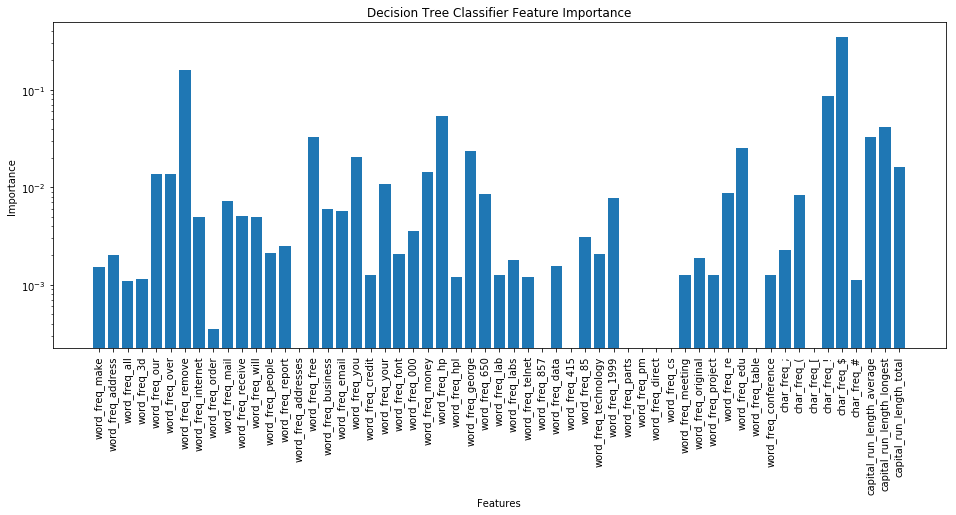

In [26]:
## Code modified from https://datawhatnow.com/feature-importance/
feature_importance = dt_model.feature_importances_
plt.figure(figsize=(16, 6))
plt.yscale('log', nonposy='clip')
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), spambase_data.columns, rotation='vertical')
plt.title('Decision Tree Classifier Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

<h3> Adaptive Boosting </h3>

In [27]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=123)
ada_model.fit(X_train, y_train)
ada_model.score(X_test, y_test)

0.94134685010861696

In [28]:
ada_cm = confusion_matrix(y_test, ada_model.predict(X_test))

pd.DataFrame(data = ada_cm, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,796,40
Actual 1,41,504


In [29]:
ada_pred = ada_model.predict(X_test)
print("Number of mislabeled emails out of a total %d emails : %d"
       % (X_test.shape[0],(y_test != ada_pred).sum()))
print("%d non-spam emails are mislabeled as spam and %d spam emails are mislabeled as non-spam."
      % (ada_cm [0,1], ada_cm[1,0]))

Number of mislabeled emails out of a total 1381 emails : 81
40 non-spam emails are mislabeled as spam and 41 spam emails are mislabeled as non-spam.


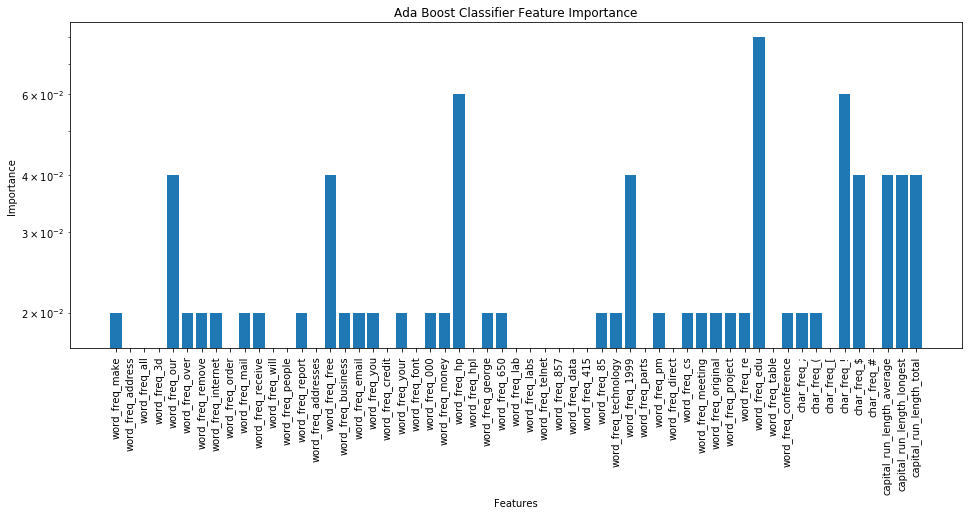

In [30]:
feature_importance = ada_model.feature_importances_
plt.figure(figsize=(16, 6))
plt.yscale('log', nonposy='clip')
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), spambase_data.columns, rotation='vertical')
plt.title('Ada Boost Classifier Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

<h3> Random Forest </h3>

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.93917451122375095

In [32]:
rf_cm = confusion_matrix(y_test, rf_model.predict(X_test))
pd.DataFrame(data = rf_cm, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,800,36
Actual 1,48,497


In [33]:
rf_pred = rf_model.predict(X_test)
print("Number of mislabeled emails out of a total %d emails : %d"
       % (X_test.shape[0],(y_test != rf_pred).sum()))
print("%d non-spam emails are mislabeled as spam and %d spam emails are mislabeled as non-spam."
      % (rf_cm [0,1], rf_cm[1,0]))

Number of mislabeled emails out of a total 1381 emails : 84
36 non-spam emails are mislabeled as spam and 48 spam emails are mislabeled as non-spam.


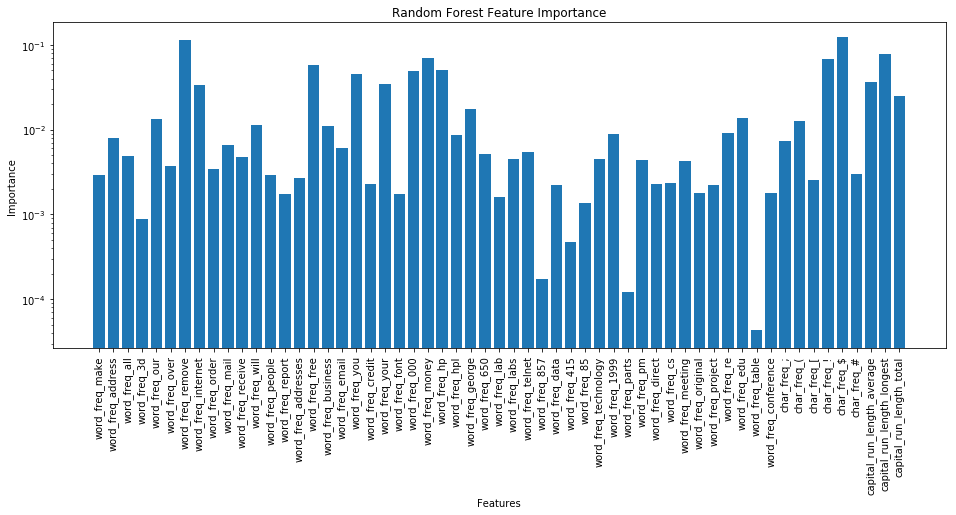

In [34]:
feature_importance = rf_model.feature_importances_
plt.figure(figsize=(16, 6))
plt.yscale('log', nonposy='clip')
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), spambase_data.columns, rotation='vertical')
plt.title('Random Forest Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

<h2> Conclusion </h2>

The following table shows the performance of our classifier models:https://datawhatnow.com/feature-importance/

In [35]:
m_results = {'Decision Tree ' : [dt_model.score(X_test, y_test), (y_test != dt_pred).sum()], 
             'Perceptron' : [precep_model.score(X_test, y_test), (y_test != precep_pred).sum()],
             'Logistic Regression' : [lreg_model.score(X_test, y_test), (y_test != lreg_pred).sum()],
             'Adaptive Boosting' : [ada_model.score(X_test, y_test), (y_test != ada_pred).sum()],
             'Support Vector Machinest' : [svm_model.score(X_test, y_test), (y_test != svm_pred).sum()],
             'Random Forest' : [rf_model.score(X_test, y_test), (y_test != rf_pred).sum()],
             'Gaussian Naive Bayes' : [gnb_model.score(X_test, y_test), (y_test != gnb_pred).sum()],
             'Multinomial Naive Bayes': [mnb_model.score(X_test, y_test), (y_test != mnb_pred).sum()] }
pd.DataFrame (m_results)
pd.DataFrame(m_results, index=['Score', 'Mislabel'])

,Adaptive Boosting,Decision Tree,Gaussian Naive Bayes,Logistic Regression,Multinomial Naive Bayes,Perceptron,Random Forest,Support Vector Machinest
Score,0.941347,0.916727,0.834902,0.925416,0.807386,0.661115,0.939175,0.813903
Mislabel,81.000000,115.000000,228.000000,103.000000,266.000000,468.000000,84.000000,257.000000


<h2> Reference </h2>
http://archive.ics.uci.edu/ml/datasets/Spambase

https://martibosch.github.io/blog/2016/08/27/how-to-do-your-machine-learning-assignments-in-10-mins.html

https://datawhatnow.com/feature-importance/